<a href="https://colab.research.google.com/github/gummallaprasanth/Students_data_EDA/blob/main/students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGEL_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d souradippal/student-performance-prediction

Dataset URL: https://www.kaggle.com/datasets/souradippal/student-performance-prediction
License(s): MIT
100% 381k/381k [00:00<00:00, 744kB/s]
100% 381k/381k [00:00<00:00, 743kB/s]


In [ ]:
!unzip student-performance-prediction.zip

Archive:  student-performance-prediction.zip
  inflating: student_performance_prediction.csv  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('students.csv')
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [ ]:
df.tail()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No
39999,S40000,11.8,55.1,68.5,No,Bachelor,Yes


In [ ]:
df.isna().sum()

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [ ]:
sub=df[["Passed",'Attendance Rate']].select_dtypes(['object','float64']).dropna()
sub.head()

,Passed,Attendance Rate
1,No,95.3
3,No,76.8
4,No,89.3
5,Yes,73.8
6,Yes,38.6


In [ ]:
df[df.isna().sum(axis=1)==3]

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed


In [ ]:
df.dropna(thresh=df.shape[1],axis=0,inplace=True)

In [ ]:
df.isna().sum()

,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,0


In [ ]:
df.shape

(29446, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29446 entries, 1 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   29446 non-null  object 
 1   Study Hours per Week                         29446 non-null  float64
 2   Attendance Rate                              29446 non-null  float64
 3   Previous Grades                              29446 non-null  float64
 4   Participation in Extracurricular Activities  29446 non-null  object 
 5   Parent Education Level                       29446 non-null  object 
 6   Passed                                       29446 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,29446.000000,29446.000000,29446.000000
mean,9.964953,75.308582,65.412986
std,5.025682,20.399216,16.591152
min,-9.200000,-14.300000,8.300000
25%,6.600000,61.600000,54.900000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [ ]:
df.corr(numeric_only=True)

,Study Hours per Week,Attendance Rate,Previous Grades
Study Hours per Week,1.000000,0.006096,0.002378
Attendance Rate,0.006096,1.000000,-0.004800
Previous Grades,0.002378,-0.004800,1.000000


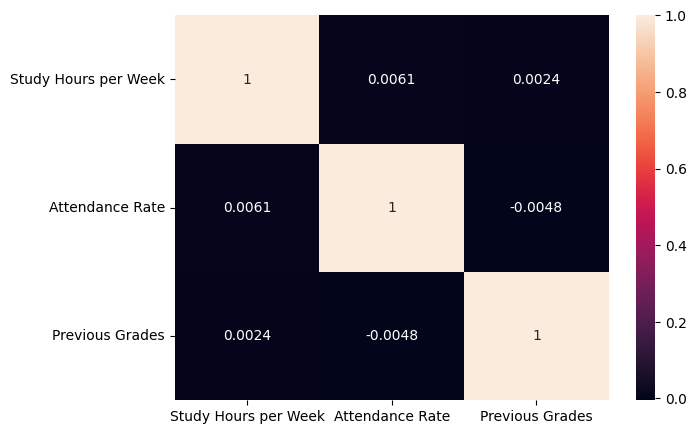

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
df.columns

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

In [ ]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes


In [ ]:
df['Parent Education Level'].value_counts()

,count
Parent Education Level,
Bachelor,5948
Associate,5928
Doctorate,5914
High School,5907
Master,5749


In [ ]:
# find the total hours of studing for each educational levels
df.groupby("Parent Education Level")["Study Hours per Week"].sum().sort_values(ascending=False).reset_index()

,Parent Education Level,Study Hours per Week
0,Bachelor,59544.9
1,Associate,59288.9
2,Doctorate,58888.3
3,High School,58626.8
4,Master,57079.1


<Axes: xlabel='Attendance Rate', ylabel='Count'>

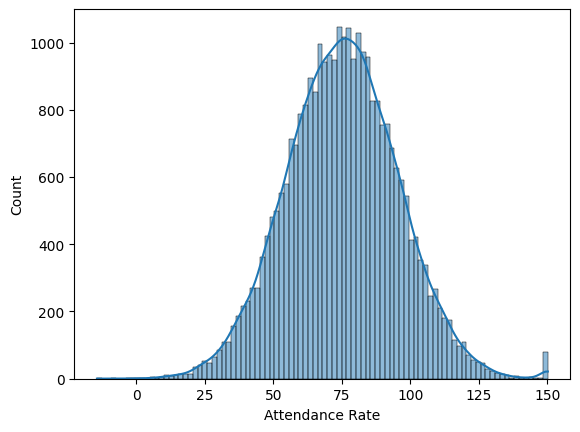

In [ ]:
sns.histplot(x="Attendance Rate",data=df,kde=True)

In [ ]:
df.columns

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

<Axes: xlabel='Parent Education Level', ylabel='count'>

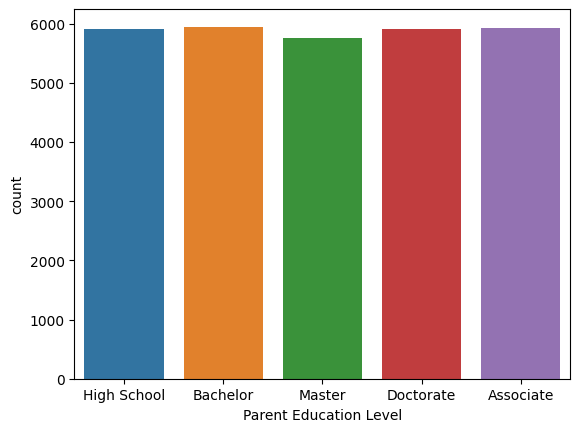

In [ ]:
sns.countplot(x="Parent Education Level",data=df,hue="Parent Education Level")

<Axes: xlabel='Participation in Extracurricular Activities', ylabel='count'>

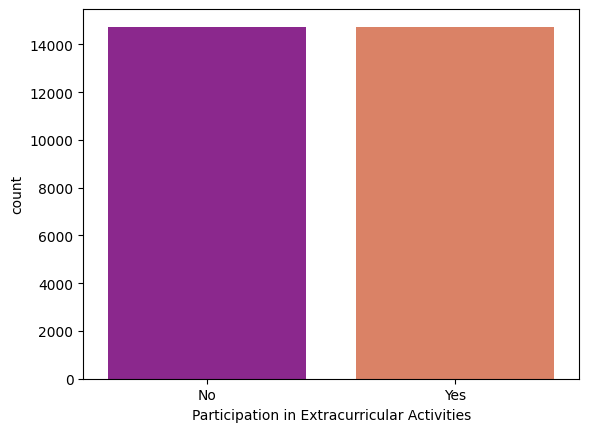

In [ ]:
sns.countplot(x='Participation in Extracurricular Activities',data=df,hue='Participation in Extracurricular Activities',palette='plasma')

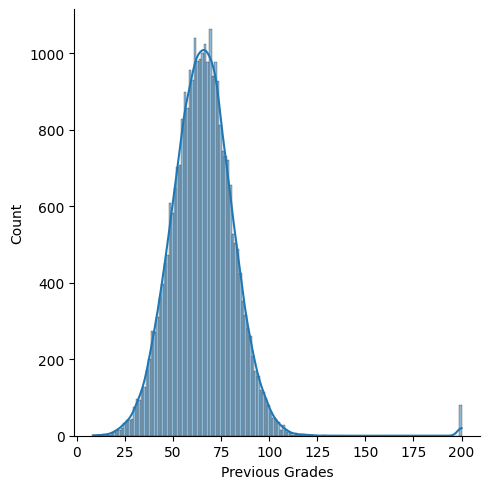

In [ ]:
sns.displot(x='Previous Grades',data=df,kde=True)

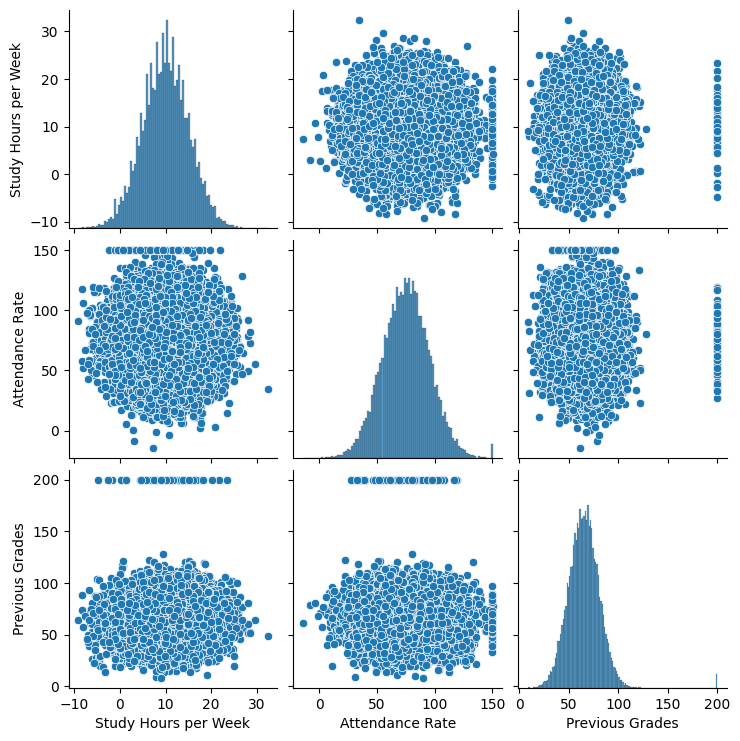

In [ ]:
sns.pairplot(df,palette='plasma',diag_kind='hist')

In [ ]:
df.columns

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

<Axes: xlabel='Study Hours per Week', ylabel='Attendance Rate'>

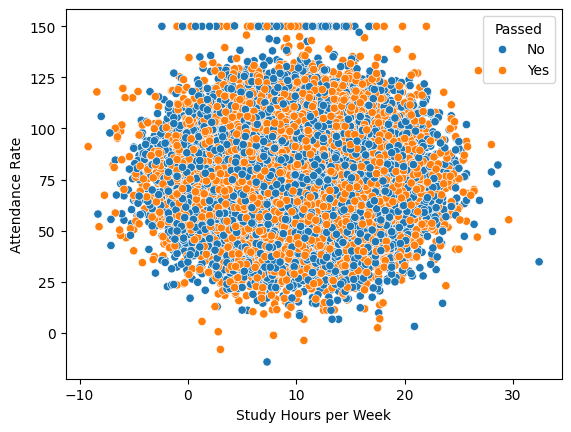

In [ ]:
sns.scatterplot(x="Study Hours per Week",y='Attendance Rate',data=df,hue='Passed')

In [ ]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes


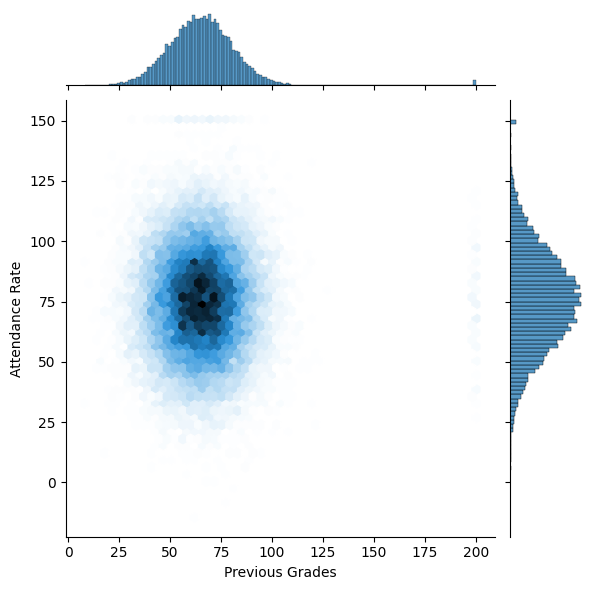

In [ ]:
sns.jointplot(x='Previous Grades',y='Attendance Rate',data=df,kind='hex')

In [ ]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes


<Axes: xlabel='Previous Grades'>

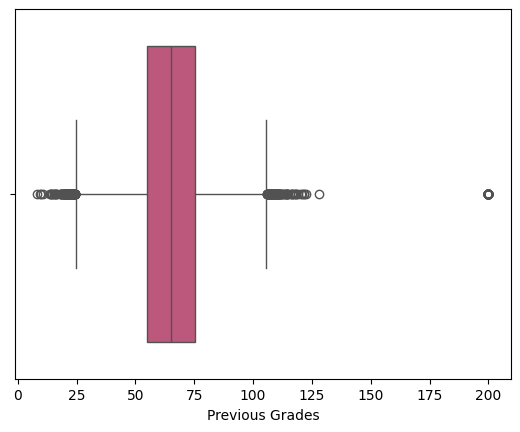

In [ ]:
sns.boxplot(x='Previous Grades',data=df,palette='plasma')

<Axes: xlabel='Previous Grades', ylabel='Passed'>

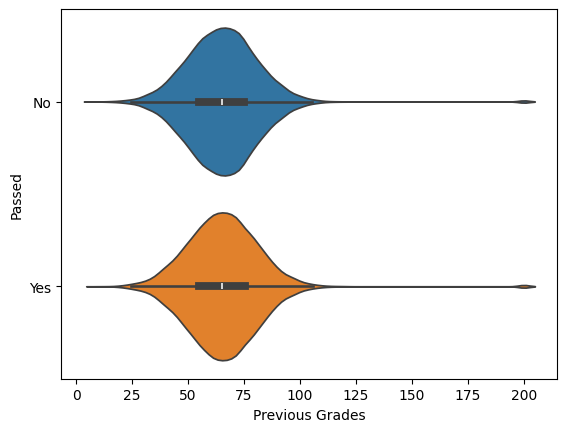

In [ ]:
sns.violinplot(x="Previous Grades",y="Passed",data=df,hue="Passed")

In [ ]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes


<Axes: >

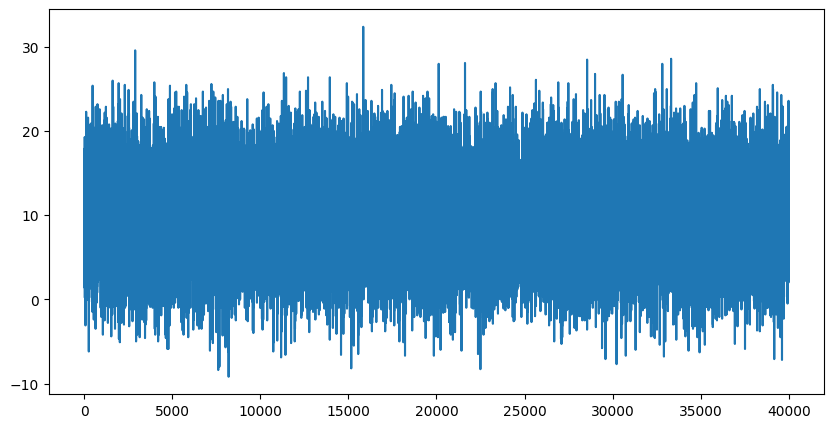

In [ ]:
plt.figure(figsize=(10,5))
df['Study Hours per Week'].plot(kind='line')

<Axes: >

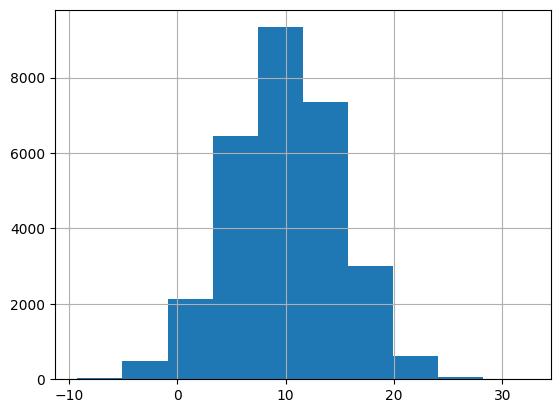

In [ ]:
df['Study Hours per Week'].hist()

In [ ]:
df['Study Hours per Week'].nlargest(10).reset_index()

,index,Study Hours per Week
0,15843,32.4
1,2895,29.6
2,33320,28.6
3,28552,28.5
4,21620,28.1
5,20126,28.0
6,32820,28.0
7,11338,26.9
8,29002,26.8
9,30569,26.7


In [ ]:
df.sample(frac=0.5)

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
36536,S36537,8.6,120.7,59.2,No,Associate,Yes
26815,S26816,4.8,91.6,101.1,Yes,Associate,No
23448,S23449,11.6,82.8,27.5,No,Associate,Yes
8935,S08936,9.8,96.8,77.2,No,Bachelor,No
19796,S19797,7.3,65.4,55.9,Yes,Associate,No
...,...,...,...,...,...,...,...
28491,S28492,17.1,35.8,84.9,No,Doctorate,No
23034,S23035,3.9,67.5,70.6,No,Bachelor,No
27939,S27940,8.9,68.0,40.7,No,Associate,No
39945,S39946,3.0,90.0,45.8,Yes,Bachelor,No


In [ ]:
df.shape

(29446, 7)